In [540]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [541]:
train_data =pd.read_csv("titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Run heatmap to see any empty rows in the data

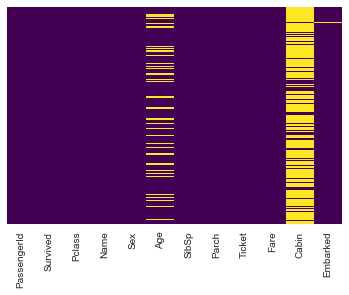

In [542]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Age, Cabin and Emarked columns have empty records


Lets substitute Age with a approximate age group for the missing age data

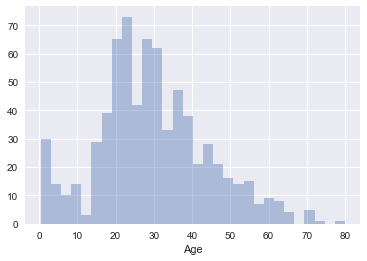

In [543]:
sns.distplot(train_data['Age'].dropna(),kde=False, bins=30)

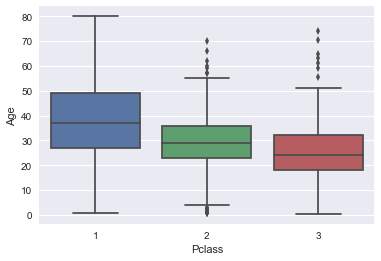

In [544]:
sns.boxplot(data=train_data,x='Pclass',y='Age')

Create a method to substitute the age

In [545]:
def sub_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 27
                
        else:
            return 24
    else:
        return Age
    
    
                    

In [546]:
train_data['Age']=train_data[['Age','Pclass']].apply(sub_age,axis=1)

Now Age coloumn is filled with average age values.

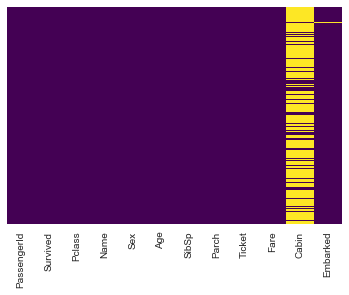

In [547]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Since Cabin data has lot of missing data we will drop the cabin data.

In [548]:
train_data.drop('Cabin',axis=1, inplace=True)

In [549]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


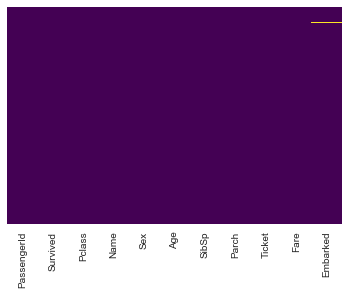

In [550]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [551]:
train_data.dropna(inplace=True)

By dropping the empty rows we have full data for analysis

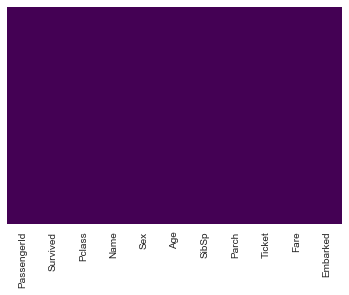

In [552]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Binarize Sex and Embarked coloumns with dummy method

In [553]:
sex= pd.get_dummies(train_data['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [554]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [555]:
embarkedcity=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [556]:
embarkedcity.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Now add this two columns back to orginal data Frame

In [557]:
train_data=pd.concat([train_data,sex,embarkedcity], axis=1)

train_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Lets drop the orginal dummy source

In [558]:
train_data.drop(['Sex','Embarked'], axis=1,inplace=True)

In [559]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


Name, Pclass and Ticket can be feature engineered.

In [560]:
s='Braund, Mr. Owen Harris'
s=s.split(',')[1]
s

' Mr. Owen Harris'

In [561]:
s.split('.')[0].strip()

'Mr'

In [562]:
train_data['Title'] = train_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,Mr


In [563]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [564]:
title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }

In [565]:
train_data['Title']=train_data['Title'].map(title_Dictionary)

In [566]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

Remove Name

In [567]:
train_data.drop('Name',axis=1, inplace=True)

In [568]:
train_data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S,Title
0,1,0,3,22.0,1,0,A/5 21171,7.2500,1,0,1,Mr
1,2,1,1,38.0,1,0,PC 17599,71.2833,0,0,0,Mrs
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,35.0,0,0,373450,8.0500,1,0,1,Mr


Royality, Officer and Miss have higher surival rate.

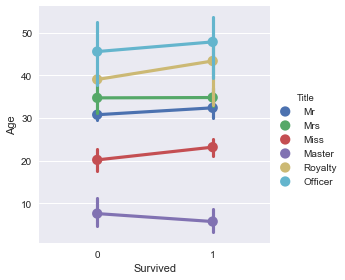

In [569]:
sns.factorplot(y='Age',x='Survived',data=train_data,hue='Title')
plt.figure(figsize=(10,12))


Feature Engineer Ticket data

In [570]:
ticket='STON/O2. 3101282'
#ticket='113803'
ticket = ticket.replace('.','')
ticket

'STON/O2 3101282'

In [571]:
ticket = ticket.replace('/','')
ticket

'STONO2 3101282'

In [572]:
ticket = map(lambda t : t.strip(), ticket)
print(list(ticket))

['S', 'T', 'O', 'N', 'O', '2', '', '3', '1', '0', '1', '2', '8', '2']


In [573]:
ticket = filter(lambda t :  not t.isdigit(), ticket)
print(list(ticket))
len(list(ticket))

[]


0

In [574]:
def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(list(ticket)) > 0:
            return list(ticket)[0]
        else: 
            return 'XXX'

In [575]:
train_data['Ticket']=train_data['Ticket'].map(cleanTicket)

train_data['Ticket'].head(5)

0        A5
1        PC
2    STONO2
3       XXX
4       XXX
Name: Ticket, dtype: object

In [576]:
train_data['Ticket'].unique()

array(['A5', 'PC', 'STONO2', 'XXX', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS', 'SOP',
       'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SOPP', 'FC', 'SOTONO2', 'CASOTON'], dtype=object)

Create dummy variable for ticket,parch,pclass and sibsp. Also notice the use of drop_first to avoid multicollinearity on classifier

In [577]:
ticket_dummy=pd.get_dummies(train_data['Ticket'],prefix="ticket",drop_first=True)

In [578]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [579]:
parch_dummy=pd.get_dummies(train_data['Parch'],prefix="Parch",drop_first=True)

In [580]:
train_data['Pclass'].unique()

array([3, 1, 2])

In [581]:
pclass_dummy=pd.get_dummies(train_data['Pclass'],prefix="pclass",drop_first=True)

In [582]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [583]:
sibsp_dummy=pd.get_dummies(train_data['SibSp'],prefix="sibsp",drop_first=True)

In [584]:
title_dummy=pd.get_dummies(train_data['Title'],drop_first=True)

Now concat all the newly created dummy coloumns to the training data frame

In [585]:
train_data=pd.concat([train_data,title_dummy,ticket_dummy,parch_dummy,pclass_dummy,sibsp_dummy], axis=1)

In [586]:
train_data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,...,Parch_5,Parch_6,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8
0,1,0,3,22.0,1,0,A5,7.2500,1,0,...,0,0,0,1,1,0,0,0,0,0
1,2,1,1,38.0,1,0,PC,71.2833,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,26.0,0,0,STONO2,7.9250,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,1,0,XXX,53.1000,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,35.0,0,0,XXX,8.0500,1,0,...,0,0,0,1,0,0,0,0,0,0


In [587]:
train_data.drop(labels=['Pclass','SibSp','Parch','Ticket','Title'],axis=1, inplace=True)

In [589]:
train_data.head(5)

,PassengerId,Survived,Age,Fare,male,Q,S,Miss,Mr,Mrs,...,Parch_5,Parch_6,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8
0,1,0,22.0,7.2500,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
1,2,1,38.0,71.2833,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,35.0,53.1000,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,0,35.0,8.0500,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [590]:
X=train_data.drop('Survived',axis=1)
y=train_data['Survived']

In [592]:
from sklearn.model_selection import train_test_split



In [593]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [594]:
from sklearn.linear_model import LogisticRegression

In [596]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [612]:
predicitons= logmodel.predict(X_test)


In [599]:
from sklearn.metrics import classification_report

In [601]:
print(classification_report(y_test,prediciton))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       163
          1       0.85      0.67      0.75       104

avg / total       0.83      0.83      0.82       267

